In [1]:
# In jupyter notebook, you parse the arguments using 
# args =parser.parse_known_args()[0]
# instaed of args = parser.parse_args()
from option import args 

use_gpu


## Load network...

In [2]:
from models.denseaspp import DenseASPP
model = DenseASPP(args.num_class)

## Make test loader

In [3]:
from dataset.horseDataset import make_dataloader

# since we only evaluation the results here
_, test_loader = make_dataloader(args) 

## Run evalution.py

The code in the cell down below is directly copied from evaluation.py since some default arguments of directories need to be modified based on your setting.

In [4]:
import torch
import matplotlib.pyplot as plt
from utils import Adder, get_miou, get_biou
from tqdm import tqdm_notebook as tqdm

def evaluation(args, model, test_loader):

    state = torch.load(args.load) # if this line does not work, please directly copy the corresponding directory here.
    model.load_state_dict(state['model'])
    model = model.to(args.device)

    mIoU = Adder()
    bIoU = Adder()

    model.eval()
    with torch.no_grad():
        for idx, (name_id, img, inputs, masks) in enumerate(tqdm(test_loader)):
            inputs, masks = inputs.to(args.device), masks.to(args.device)

            outputs = model(inputs)
            mIoU(get_miou(outputs, masks))
            bIoU(get_biou(outputs, masks))

            outputs = outputs.cpu().squeeze()
            outputs = torch.argmax(outputs,dim=0)
            print(name_id)
            fig = plt.figure(figsize=(12, 8))
            plt.subplot(1, 3, 1), plt.imshow(img.squeeze()), plt.axis('off')
            plt.title('Original')

            plt.subplot(1, 3, 2), plt.imshow(masks.cpu().squeeze(), 'gray'), plt.axis('off')
            plt.title('GroundTruth')

            plt.subplot(1, 3, 3), plt.imshow(outputs, 'gray'), plt.axis('off')
            plt.title('Output')

            plt.show()

    print('mIOU:%.3f' % mIoU.average())
    print('bIOU:%.3f' % bIoU.average())
    print('Done!')

    return

<ipython-input-4-4fbb25891c91>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, (name_id, img, inputs, masks) in enumerate(tqdm(test_loader)):


  0%|          | 0/50 [00:00<?, ?it/s]

['horse232.png']


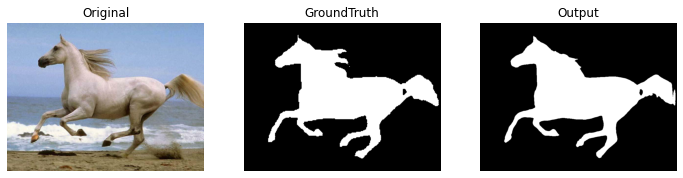

['horse111.png']


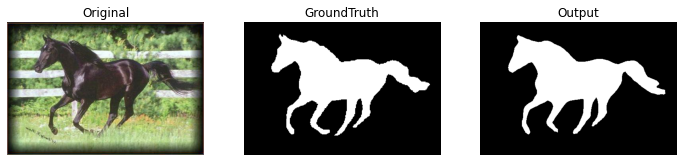

['horse251.png']


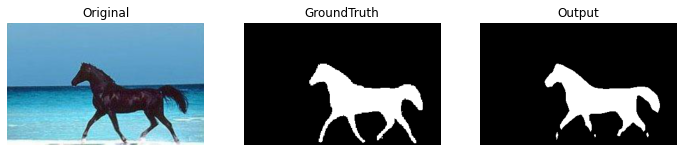

['horse010.png']


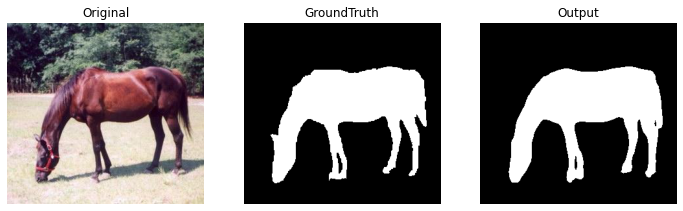

['horse221.png']


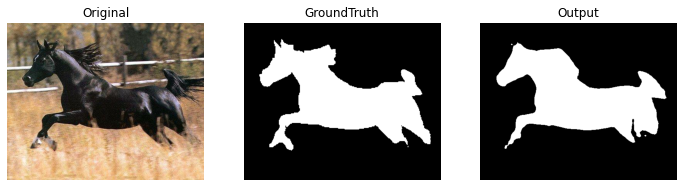

['horse276.png']


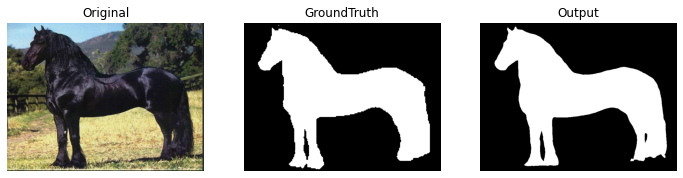

['horse200.png']


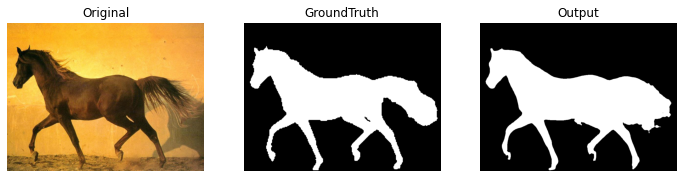

['horse205.png']


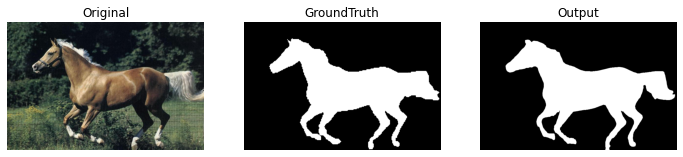

['horse102.png']


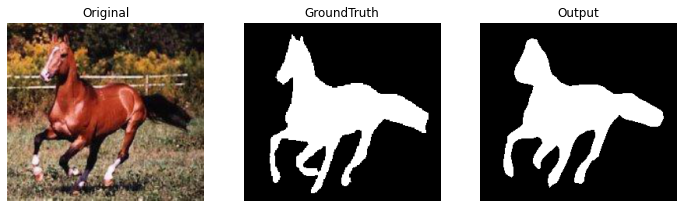

['horse182.png']


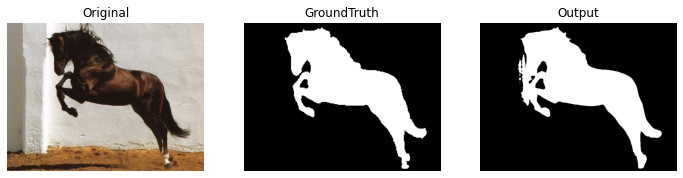

['horse320.png']


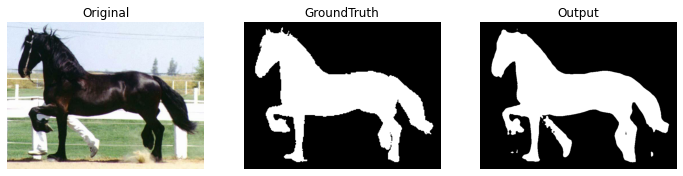

['horse140.png']


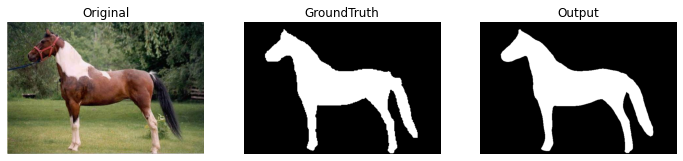

['horse267.png']


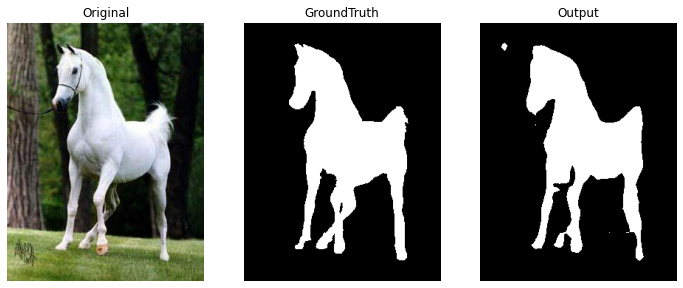

['horse154.png']


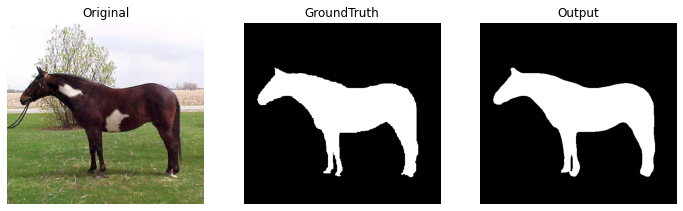

['horse145.png']


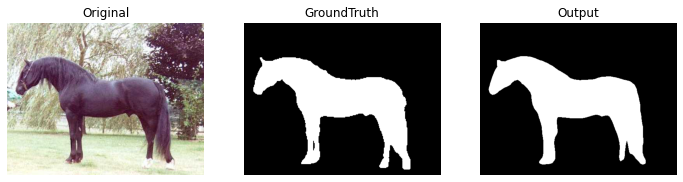

['horse026.png']


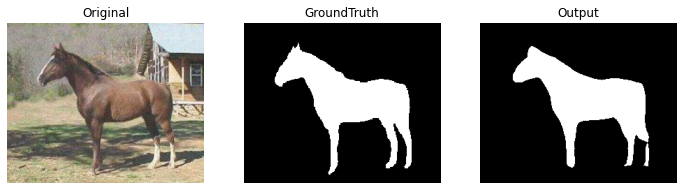

['horse006.png']


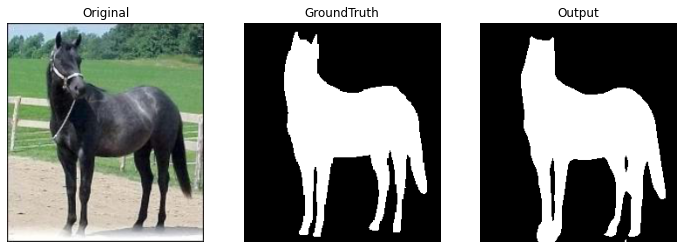

['horse083.png']


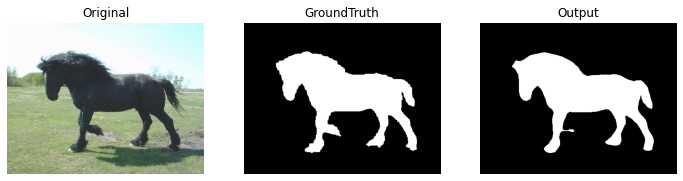

['horse180.png']


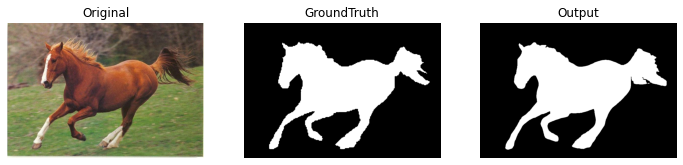

['horse047.png']


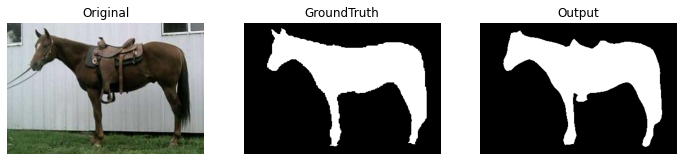

['horse273.png']


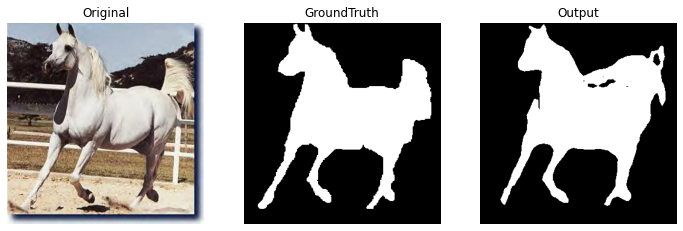

['horse323.png']


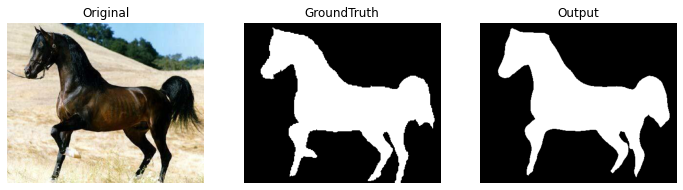

['horse115.png']


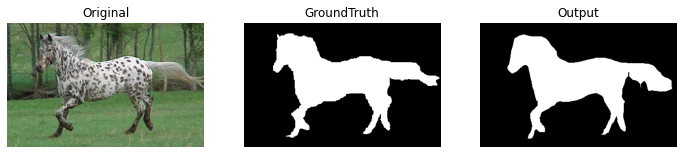

['horse119.png']


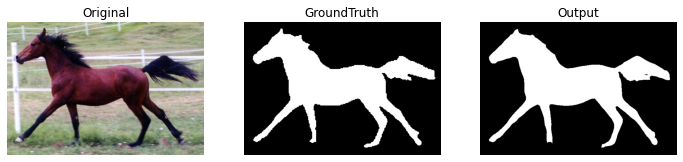

['horse064.png']


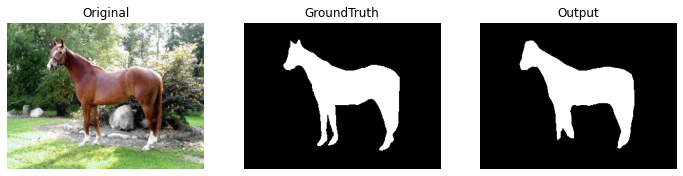

['horse310.png']


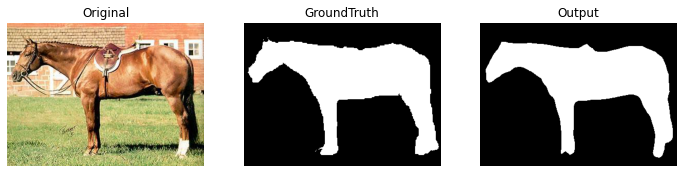

['horse245.png']


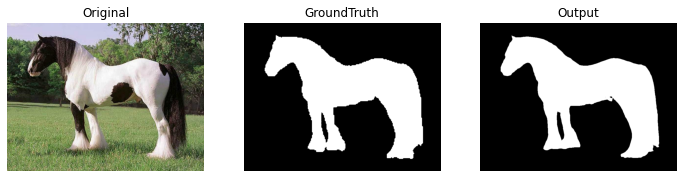

['horse210.png']


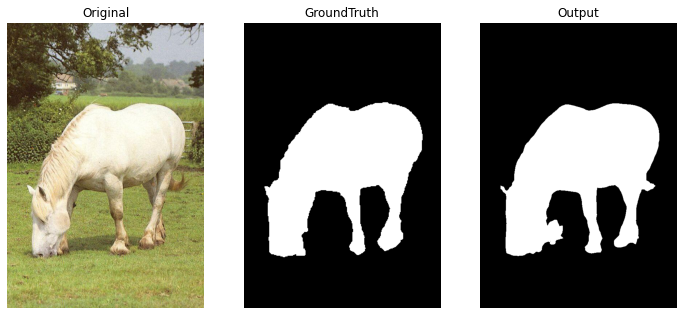

['horse255.png']


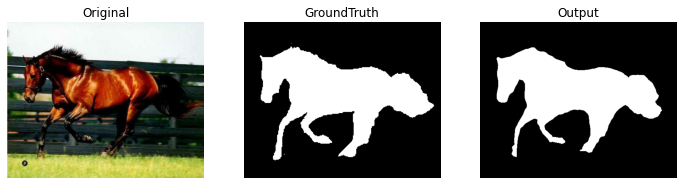

['horse178.png']


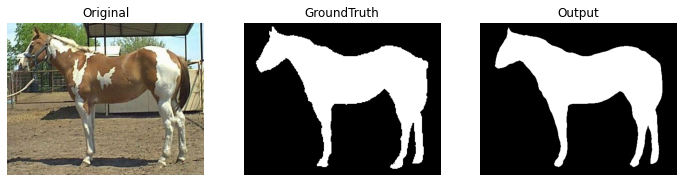

['horse304.png']


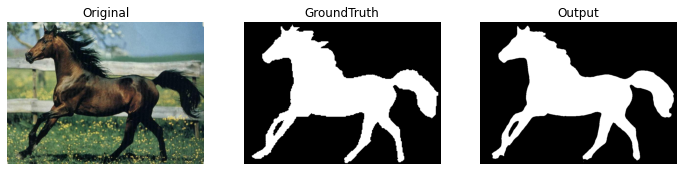

['horse176.png']


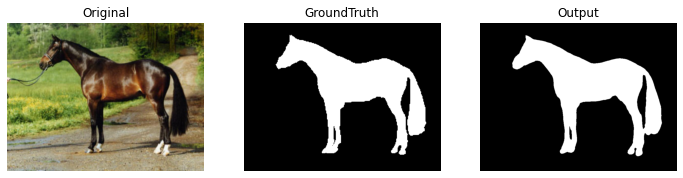

['horse056.png']


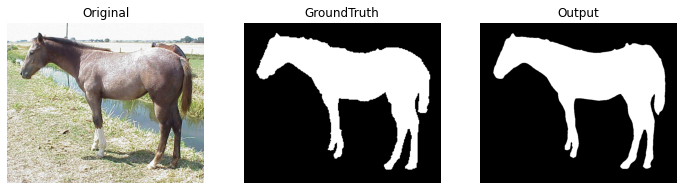

['horse034.png']


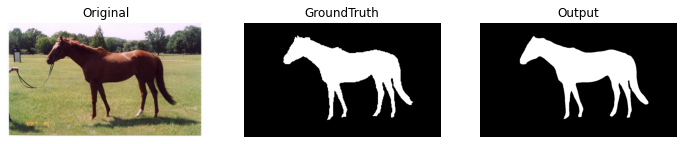

['horse164.png']


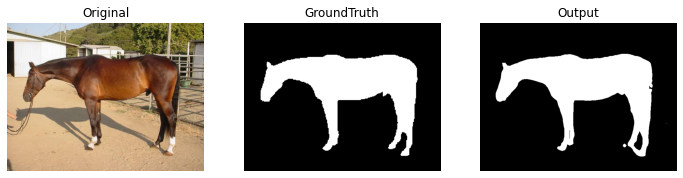

['horse168.png']


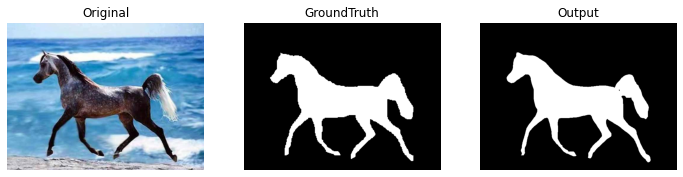

['horse287.png']


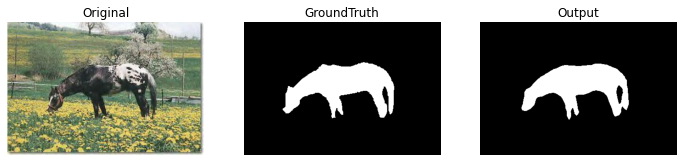

['horse043.png']


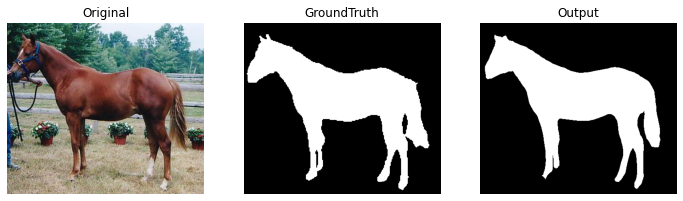

['horse120.png']


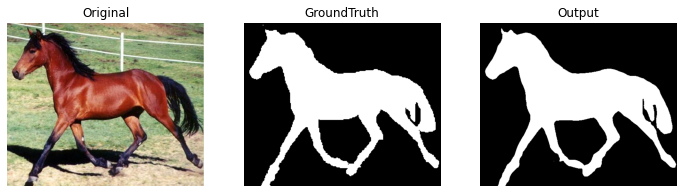

['horse174.png']


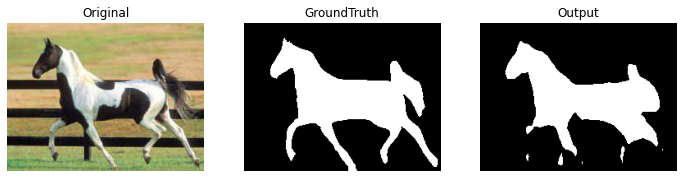

['horse046.png']


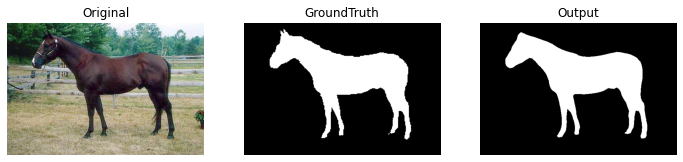

['horse307.png']


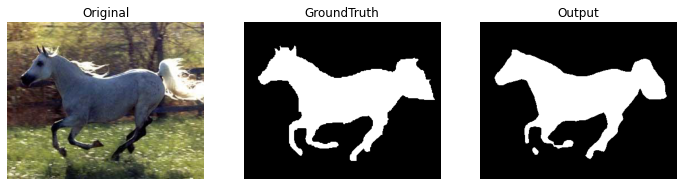

['horse085.png']


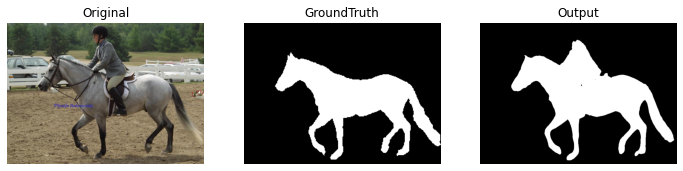

['horse296.png']


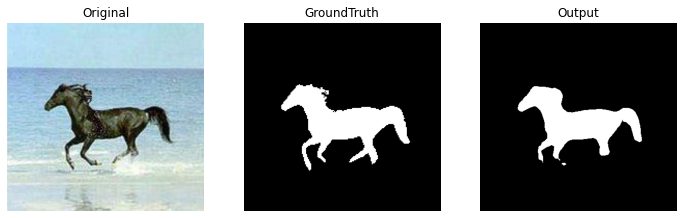

['horse058.png']


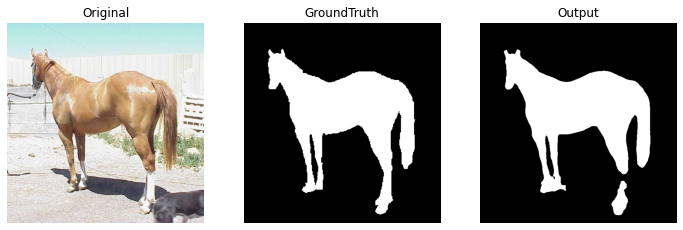

['horse017.png']


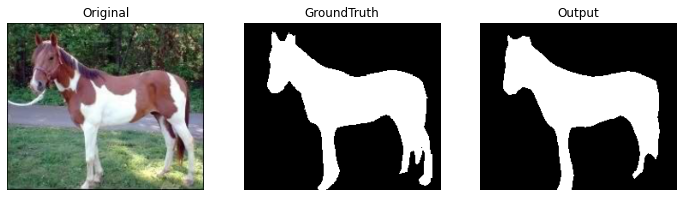

['horse206.png']


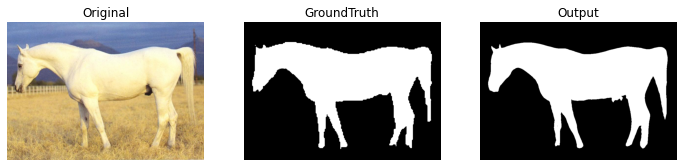

['horse170.png']


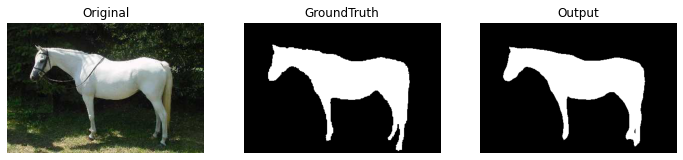

['horse100.png']


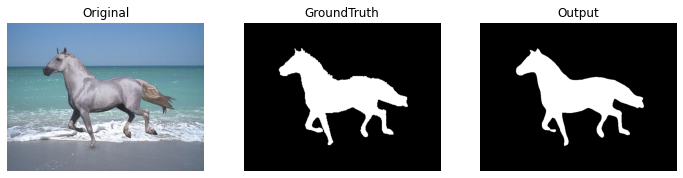

['horse104.png']


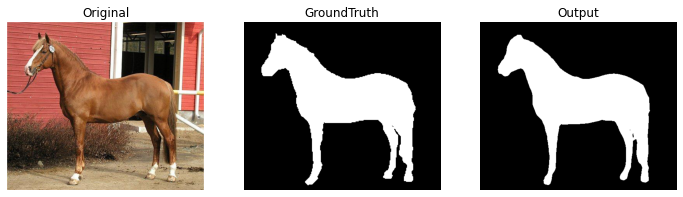

mIOU:0.910
bIOU:0.752
Done!


In [5]:
evaluation(args, model, test_loader)